Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



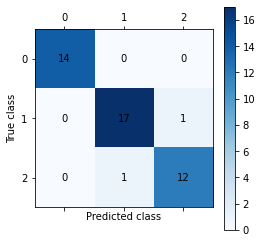

Random Forest cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Random Forest mean cross-validation score: 0.9666666666666668

Naive Bayes Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



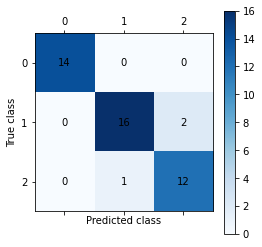

Naive Bayes cross-validation scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
RNaive Bayes cross-validation score: 0.9533333333333334

SVM Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



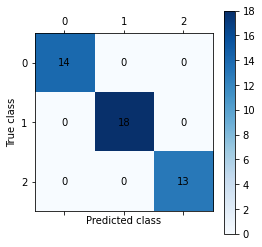

SVM cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
SVM mean cross-validation score: 0.9800000000000001

Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



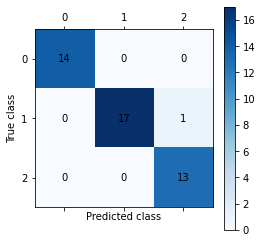

Logistic Regression cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Logistic Regression mean cross-validation score: 0.9733333333333334



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the iris dataset
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Convert class labels to numerical values
iris_df['class'] = pd.factorize(iris_df['class'])[0]

# Split the data into features (X) and labels (y)
X = iris_df.drop('class', axis=1)
y = iris_df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a random forest classifier and fit it to the training data
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_clf.fit(X_train, y_train)

# Make predictions for the test set using random forest
y_pred_rf = rf_clf.predict(X_test)

# Compute and plot classification report and confusion matrix for random forest
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.matshow(conf_matrix_rf, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(j, i, conf_matrix_rf[i,j], va='center', ha='center')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Compute and plot cross-validation scores for random forest
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print(f"Random Forest cross-validation scores: {rf_cv_scores}")
print(f"Random Forest mean cross-validation score: {np.mean(rf_cv_scores)}")
print("")




# Create a Naive Bayes classifier and fit it to the training data
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Make predictions for the test set using Naive Bayes
y_pred_nb = nb_clf.predict(X_test)

# Compute and plot classification report and confusion matrix for Naive Bayes
print("Naive Bayes Results")
print(classification_report(y_test, y_pred_nb))
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.matshow(conf_matrix_nb, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(conf_matrix_nb.shape[0]):
    for j in range(conf_matrix_nb.shape[1]):
        plt.text(j, i, conf_matrix_nb[i,j], va='center', ha='center')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Compute and plot cross-validation scores for Naive Bayes
nb_cv_scores = cross_val_score(nb_clf, X, y, cv=5)
print(f"Naive Bayes cross-validation scores: {nb_cv_scores}")
print(f"RNaive Bayes cross-validation score: {np.mean(nb_cv_scores)}")
print("")


# Create an SVM classifier and fit it to the training data
svm_clf = SVC(kernel='linear', C=1, random_state=1)
svm_clf.fit(X_train, y_train)

# Make predictions for the test set using SVM
y_pred_svm = svm_clf.predict(X_test)

# Compute and plot classification report and confusion matrix for SVM
print("SVM Results")
print(classification_report(y_test, y_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.matshow(conf_matrix_svm, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        plt.text(j, i, conf_matrix_svm[i,j], va='center', ha='center')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Compute and plot cross-validation scores for SVM
svm_cv_scores = cross_val_score(svm_clf, X, y, cv=5)
print(f"SVM cross-validation scores: {svm_cv_scores}")
print(f"SVM mean cross-validation score: {np.mean(svm_cv_scores)}")
print("")


# Create a logistic regression classifier and fit it to the training data
lr_clf = LogisticRegression(random_state=1)
lr_clf.fit(X_train, y_train)

# Make predictions for the test set using logistic regression
y_pred_lr = lr_clf.predict(X_test)

# Compute and plot classification report and confusion matrix for logistic regression
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.matshow(conf_matrix_lr, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(conf_matrix_lr.shape[0]):
    for j in range(conf_matrix_lr.shape[1]):
        plt.text(j, i, conf_matrix_lr[i,j], va='center', ha='center')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Compute and plot cross-validation scores for logistic regression
lr_cv_scores = cross_val_score(lr_clf, X, y, cv=5)
print(f"Logistic Regression cross-validation scores: {lr_cv_scores}")
print(f"Logistic Regression mean cross-validation score: {np.mean(lr_cv_scores)}")
print("")

Stacking Classifier Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



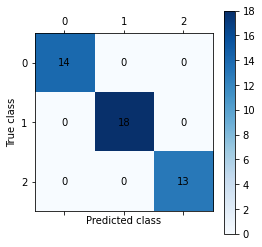

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base models
rf_clf = RandomForestClassifier(n_estimators=100)
nb_clf = GaussianNB()
svm_clf = SVC(kernel='linear')
logreg_clf = LogisticRegression(max_iter=10000)

# Define the meta-classifier
dt_clf = DecisionTreeClassifier()

# Define the stacking classifier
estimators = [('rf', rf_clf), ('nb', nb_clf), ('svm', svm_clf), ('logreg', logreg_clf)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=dt_clf)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict the labels of the test
y_pred_stacking = stacking_clf.predict(X_test)

# Compute and plot classification report and confusion matrix for stacking classifier
print("Stacking Classifier Results")
print(classification_report(y_test, y_pred_stacking))
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.matshow(conf_matrix_stacking, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(conf_matrix_stacking.shape[0]):
    for j in range(conf_matrix_stacking.shape[1]):
        plt.text(j, i, conf_matrix_stacking[i,j], va='center', ha='center')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()